## Deep Learning with Python - Francois Chollet

### Chapter 3. Getting started with neural networks

This chapter covers:
- Core components of neural networks
- An introduction to Keras
- Setting up a deep learning workstation
- Using neural networks to solver basic classification and regression problems

We will use neural networks to solve the three most common cases: binary classification, multiclass classification and scalar regression.

#### 1. Classifying movie reviews: a binary classification example
In this example, we will learn to classify movie reviews as positive or negative, based on the text content of the reviews.
Wwe will work with the IMDB dataset: a set of 50.000 highly polarized reviews from the Internet Movie Database. They are split into 25.000 reviews for training and 25.000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [52]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The argument `num_words=10000` means you will only keep the top 10.000 most frequently ocurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size. The variables `training_data` and `test_data` are lists of reviews; each review is a list of word indices (encoding a sequence of words). `train_labels` and `test_labels` are lists of 0s and 1s, whre 0 stands for *negative* and 1 stands for *positive*.

In [53]:
print(f"Training data: {train_data[0][0:10]}")
print(f"Training labels: {train_labels[0]}")
print(f"Max index: {max([max(sequence) for sequence in train_data])}")

Training data: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
Training labels: 1
Max index: 9999


In [54]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [55]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(f"Decoded review: {decoded_review}")

Decoded review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have do

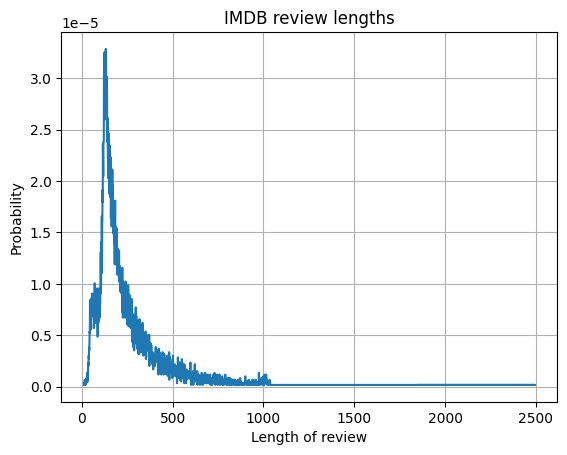

In [56]:
# plot a histogram of the lengths of the reviews
import matplotlib.pyplot as plt
import numpy as np

lengths = [len(sequence) for sequence in train_data]
total_length = sum(lengths)
lengths_dict = {length: lengths.count(length) for length in set(lengths)}
x = np.array(list(lengths_dict.keys()))
p = np.array(list(lengths_dict.values())) / total_length

plt.figure()
plt.plot(x, p, '-')
plt.xlabel('Length of review')
plt.ylabel('Probability')
plt.title('IMDB review lengths')
plt.grid()
plt.show()

In [57]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    # This is a matrix of 0s and 1s, where each row is a one-hot encoding of the input sequence
    # Each row has a 1 at the index of the word in the sequence
    # This is a very memory-efficient way to store the data
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(f"Vectorized training data: {x_train[0]}")
print(f"Vectorized testing data: {x_test[0]}")

Vectorized training data: [0. 1. 1. ... 0. 0. 0.]
Vectorized testing data: [0. 1. 1. ... 0. 0. 0.]


In [58]:
# You should also vectorize the labels, which is straightforward
# Turn a list of integers into a tensor of 0s and 1s
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.InputLayer(shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Configuring the optimizer
# from keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Using custom losses and metrics
# from keras import losses
# from keras import metrics
# model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [59]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

You'll now train th emodel for 20 epochs over all samples in the `x_train` and `y_train` tensors, in mini-batches of 512 samples. At the same time, you will monitor loss and accuracy on the 10.000 samples that you set apart. You do so by passing the validation data as the `validation_argument` argument.

In [10]:
# Training the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

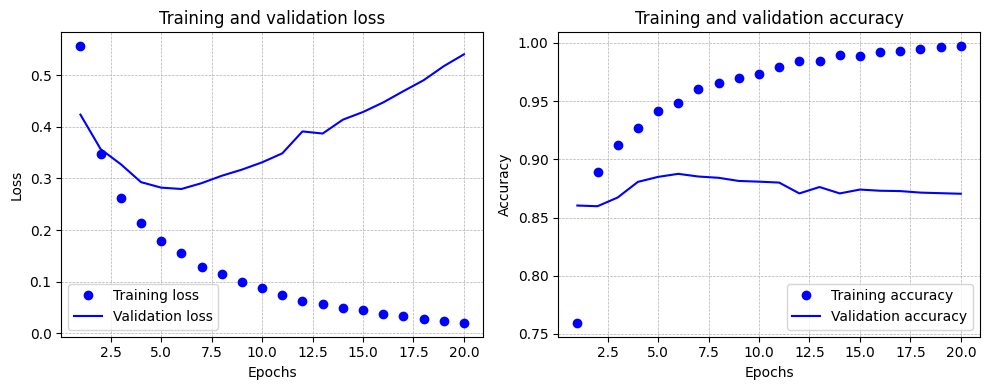

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history

# loss values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# accuracy values
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

# plot both: loss and accuracy in subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(epochs, loss_values, 'bo', label='Training loss')
axes[0].plot(epochs, val_loss_values, 'b', label='Validation loss')
axes[0].set_title('Training and validation loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(linewidth=0.5, linestyle='--')

axes[1].plot(epochs, acc_values, 'bo', label='Training accuracy')
axes[1].plot(epochs, val_acc_values, 'b', label='Validation accuracy')
axes[1].set_title('Training and validation accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()


Notes: As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradient- descent optimization—the quantity you’re trying to minimize should be less with every iteration. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfit- ting: after the second epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

In [13]:
model = models.Sequential()
model.add(layers.InputLayer(shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512, verbose=0)
results = model.evaluate(x_test, y_test)

print(f"Results: {results}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - acc: 0.8803 - loss: 0.2957
Results: [0.29317590594291687, 0.8824800252914429]


After having trained a network, you’ll want to use it in a practical setting. You can gen- erate the likelihood of reviews being positive by using the predict method:

In [14]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step


array([[0.24974434],
       [0.9957634 ],
       [0.8957466 ],
       ...,
       [0.14230867],
       [0.10375311],
       [0.7000361 ]], dtype=float32)

As you can see, the network is confident for some samples (0.99 or more, or 0.01 or
less) but less confident for others (0.6, 0.4).

##### Let's use 32 hidden neurons instead of 16

In [15]:
# Let's use 32 hidden neurons instead of 16
model = models.Sequential()
model.add(layers.InputLayer(shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=40, batch_size=512, verbose=0, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

print(f"Results: Accuracy: {results[1]} \t Loss: {results[0]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - acc: 0.8612 - loss: 1.1078
Results: Accuracy: 0.8620799779891968 	 Loss: 1.1023132801055908


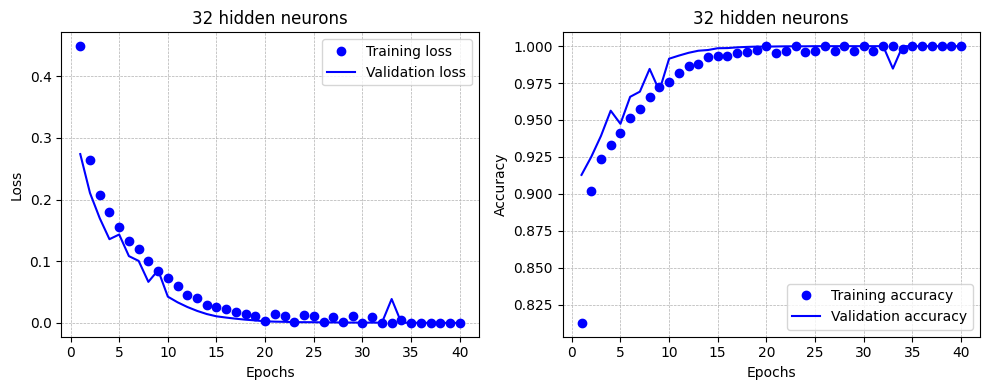

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history

# loss values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# accuracy values
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

# plot both: loss and accuracy in subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(epochs, loss_values, 'bo', label='Training loss')
axes[0].plot(epochs, val_loss_values, 'b', label='Validation loss')
axes[0].set_title('32 hidden neurons')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(linewidth=0.5, linestyle='--')

axes[1].plot(epochs, acc_values, 'bo', label='Training accuracy')
axes[1].plot(epochs, val_acc_values, 'b', label='Validation accuracy')
axes[1].set_title('32 hidden neurons')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()

##### Let's use 64 hidden neurons instead of 16

In [17]:
model = models.Sequential()
model.add(layers.InputLayer(shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=30, batch_size=512, verbose=0, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

print(f"Results: Accuracy: {results[1]} \t Loss: {results[0]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - acc: 0.8659 - loss: 0.9583
Results: Accuracy: 0.8674799799919128 	 Loss: 0.9532526731491089


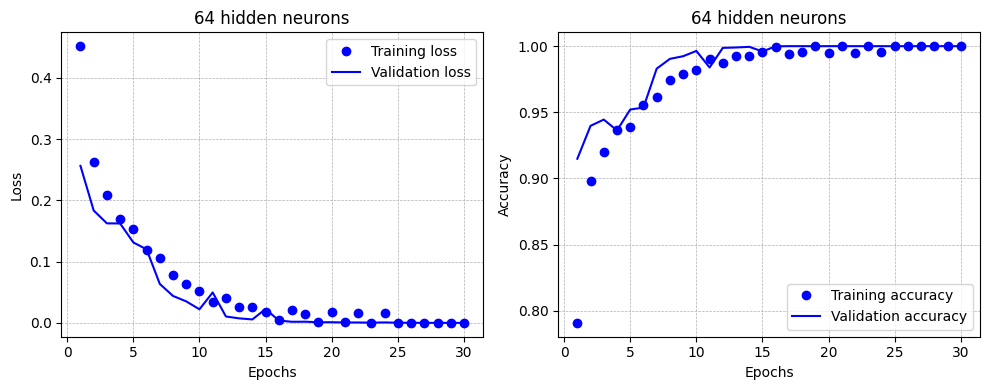

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history

# loss values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# accuracy values
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

# plot both: loss and accuracy in subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(epochs, loss_values, 'bo', label='Training loss')
axes[0].plot(epochs, val_loss_values, 'b', label='Validation loss')
axes[0].set_title('64 hidden neurons')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(linewidth=0.5, linestyle='--')

axes[1].plot(epochs, acc_values, 'bo', label='Training accuracy')
axes[1].plot(epochs, val_acc_values, 'b', label='Validation accuracy')
axes[1].set_title('64 hidden neurons')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()

##### Let's use one hidden layer instead of two (with 16 neurons)

In [19]:
model = models.Sequential()
model.add(layers.InputLayer(shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=50, batch_size=512, verbose=0, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

print(f"Results: Accuracy: {results[1]} \t Loss: {results[0]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - acc: 0.8504 - loss: 0.8538
Results: Accuracy: 0.8507199883460999 	 Loss: 0.8465015888214111


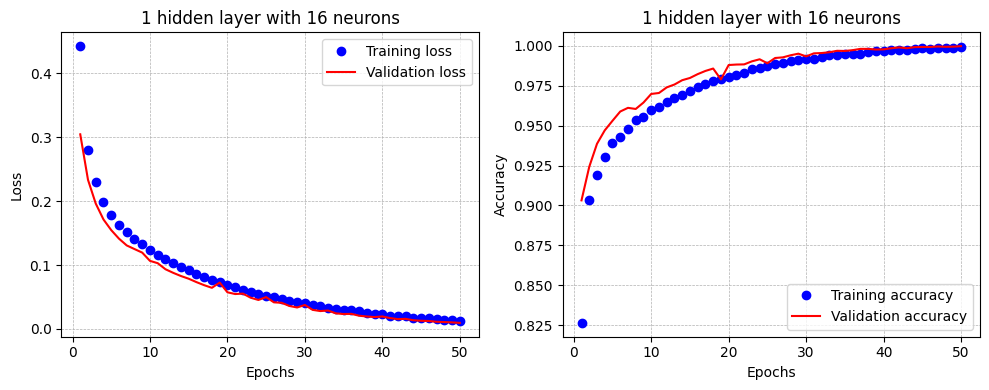

In [20]:
import matplotlib.pyplot as plt

history_dict = history.history

# loss values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# accuracy values
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

# plot both: loss and accuracy in subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(epochs, loss_values, 'bo', label='Training loss')
axes[0].plot(epochs, val_loss_values, 'r', label='Validation loss')
axes[0].set_title('1 hidden layer with 16 neurons')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(linewidth=0.5, linestyle='--')

axes[1].plot(epochs, acc_values, 'bo', label='Training accuracy')
axes[1].plot(epochs, val_acc_values, 'r', label='Validation accuracy')
axes[1].set_title('1 hidden layer with 16 neurons')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()

##### Let's use three hidden layer instead of two (with 16 neurons)

In [60]:
model = models.Sequential()
model.add(layers.InputLayer(shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=50, batch_size=512, verbose=0, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

print(f"Results: Accuracy: {results[1]} \t Loss: {results[0]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - acc: 0.8579 - loss: 1.3966
Results: Accuracy: 0.8598399758338928 	 Loss: 1.3875741958618164


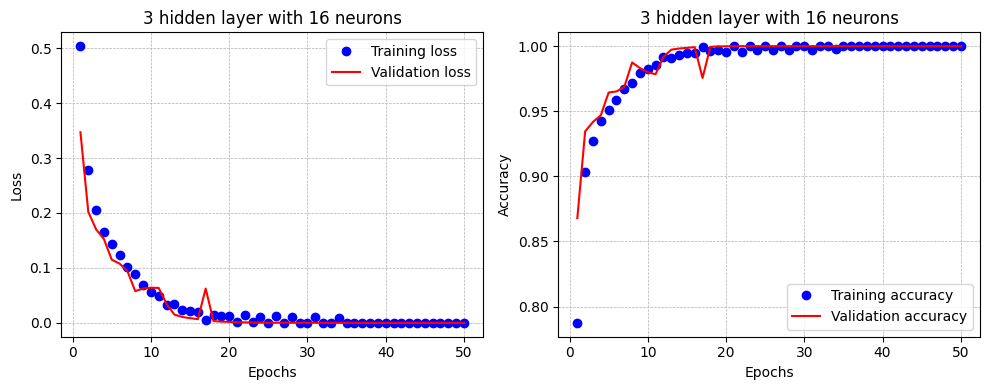

In [61]:
import matplotlib.pyplot as plt

history_dict = history.history

# loss values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# accuracy values
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

# plot both: loss and accuracy in subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(epochs, loss_values, 'bo', label='Training loss')
axes[0].plot(epochs, val_loss_values, 'r', label='Validation loss')
axes[0].set_title('3 hidden layer with 16 neurons')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(linewidth=0.5, linestyle='--')

axes[1].plot(epochs, acc_values, 'bo', label='Training accuracy')
axes[1].plot(epochs, val_acc_values, 'r', label='Validation accuracy')
axes[1].set_title('3 hidden layer with 16 neurons')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()

##### Let's use `mse` loss instead of `binary_crossentropy`.

In [23]:
# MSE loss function
model = models.Sequential()
model.add(layers.InputLayer(shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])
history_mse = model.fit(x_train, y_train, epochs=50, batch_size=512, verbose=0, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print(f"Results: Accuracy: {results[1]} \t Loss: {results[0]}")

# Cross-entropy loss function
model = models.Sequential()
model.add(layers.InputLayer(shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_bce = model.fit(x_train, y_train, epochs=50, batch_size=512, verbose=0, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print(f"Results: Accuracy: {results[1]} \t Loss: {results[0]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - acc: 0.8609 - loss: 0.1135
Results: Accuracy: 0.8615599870681763 	 Loss: 0.11285708844661713
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - acc: 0.8490 - loss: 0.8230
Results: Accuracy: 0.8507599830627441 	 Loss: 0.8152687549591064


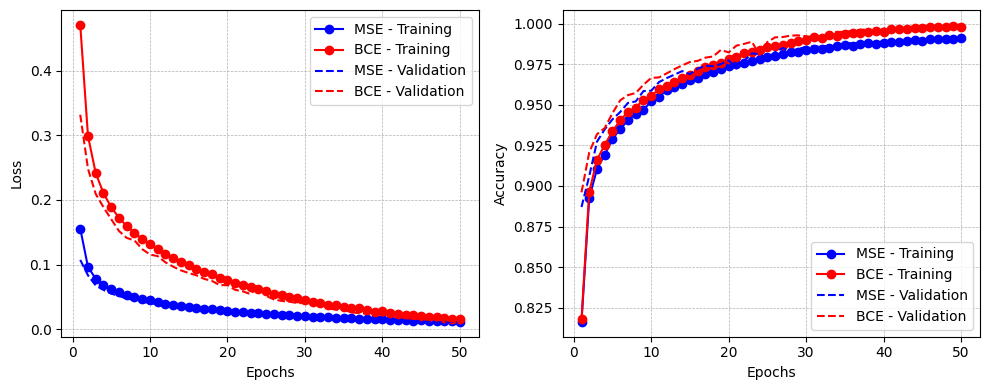

In [24]:
import matplotlib.pyplot as plt

# MSE loss
history_mse_dict = history_mse.history
mse_loss_values = history_mse_dict['loss']
mse_val_loss_values = history_mse_dict['val_loss']
mse_acc_values = history_mse_dict['acc']
mse_val_acc_values = history_mse_dict['val_acc']

# Cross-entropy loss
history_bce_dict = history_bce.history
bce_loss_values = history_bce_dict['loss']
bce_val_loss_values = history_bce_dict['val_loss']
bce_acc_values = history_bce_dict['acc']
bce_val_acc_values = history_bce_dict['val_acc']

epochs = range(1, len(mse_loss_values) + 1)

# plot both: loss and accuracy in subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(epochs, mse_loss_values, 'bo-', label='MSE - Training')
axes[0].plot(epochs, bce_loss_values, 'ro-', label='BCE - Training')
axes[0].plot(epochs, mse_val_loss_values, 'b--', label='MSE - Validation')
axes[0].plot(epochs, bce_val_loss_values, 'r--', label='BCE - Validation')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(linewidth=0.5, linestyle='--')

axes[1].plot(epochs, mse_acc_values, 'bo-', label='MSE - Training')
axes[1].plot(epochs, bce_acc_values, 'ro-', label='BCE - Training')
axes[1].plot(epochs, mse_val_acc_values, 'b--', label='MSE - Validation')
axes[1].plot(epochs, bce_val_acc_values, 'r--', label='BCE - Validation')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()

##### Let's use `tanh` instead of `relu`.

In [25]:
# tanh activation function
model = models.Sequential()
model.add(layers.InputLayer(shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_tanh = model.fit(x_train, y_train, epochs=50, batch_size=512, verbose=0, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print(f"Results (tanh): Accuracy: {results[1]} \t Loss: {results[0]}")

# Cross-entropy loss function
model = models.Sequential()
model.add(layers.InputLayer(shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_relu = model.fit(x_train, y_train, epochs=50, batch_size=512, verbose=0, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print(f"Results (relu): Accuracy: {results[1]} \t Loss: {results[0]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - acc: 0.8431 - loss: 1.2276
Results (tanh): Accuracy: 0.8438000082969666 	 Loss: 1.2218682765960693
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - acc: 0.8484 - loss: 0.8361
Results (relu): Accuracy: 0.8498799800872803 	 Loss: 0.8303177952766418


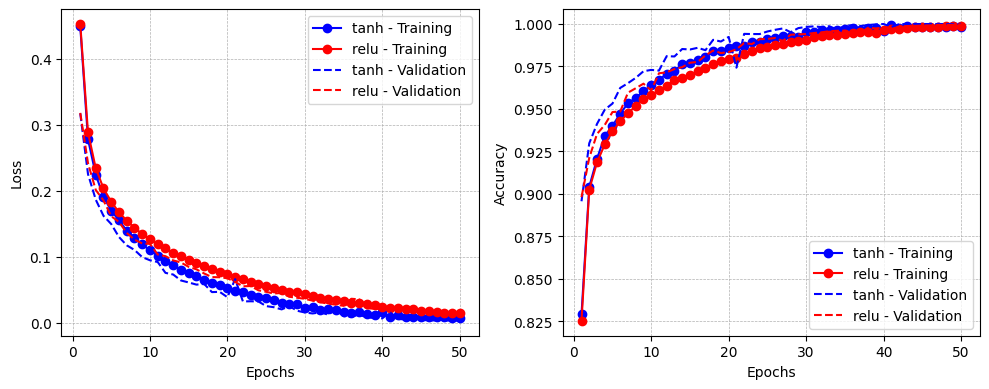

In [26]:
import matplotlib.pyplot as plt

# tanh activation function
history_tanh_dict = history_tanh.history
tanh_loss_values = history_tanh_dict['loss']
tanh_val_loss_values = history_tanh_dict['val_loss']
tanh_acc_values = history_tanh_dict['acc']
tanh_val_acc_values = history_tanh_dict['val_acc']

# relu activation function
history_relu_dict = history_relu.history
relu_loss_values = history_relu_dict['loss']
relu_val_loss_values = history_relu_dict['val_loss']
relu_acc_values = history_relu_dict['acc']
relu_val_acc_values = history_relu_dict['val_acc']

epochs = range(1, len(mse_loss_values) + 1)

# plot both: loss and accuracy in subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(epochs, tanh_loss_values, 'bo-', label='tanh - Training')
axes[0].plot(epochs, relu_loss_values, 'ro-', label='relu - Training')
axes[0].plot(epochs, tanh_val_loss_values, 'b--', label='tanh - Validation')
axes[0].plot(epochs, relu_val_loss_values, 'r--', label='relu - Validation')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(linewidth=0.5, linestyle='--')

axes[1].plot(epochs, tanh_acc_values, 'bo-', label='tanh - Training')
axes[1].plot(epochs, relu_acc_values, 'ro-', label='relu - Training')
axes[1].plot(epochs, tanh_val_acc_values, 'b--', label='tanh - Validation')
axes[1].plot(epochs, relu_val_acc_values, 'r--', label='relu - Validation')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()

#### 2. Classifying newswires: a multiclass classification example
In this section, you’ll build a network to classify Reuters newswires into 46 mutually exclusive topics. Because you have many classes, this problem is an instance of multiclass classification; and because each data point should be classified into only one category, the problem is more specifically an instance of single-label, multiclass classification. If each data point could belong to multiple categories (in this case, topics), you’d be facing a multilabel, multiclass classification problem.

In [27]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [28]:
print(f"Number of training samples:\t{len(train_data)}")
print(f"Number of testing samples:\t{len(test_data)}")

Number of training samples:	8982
Number of testing samples:	2246


As with the IMDB reviews, each example is a list of integers (word indices):

In [29]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


The label associated with an example is an integer between 0 and 45—a topic index:

In [30]:
train_labels[10]

3

In [31]:
# Encoding the data
import numpy as np
from keras.utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [32]:
# Building the network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.InputLayer(shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)
results = model.evaluate(x_test, one_hot_test_labels)
print(f"Results: Accuracy: {results[1]} \t Loss: {results[0]}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - acc: 0.8019 - loss: 0.9902
Results: Accuracy: 0.792965292930603 	 Loss: 1.015803337097168


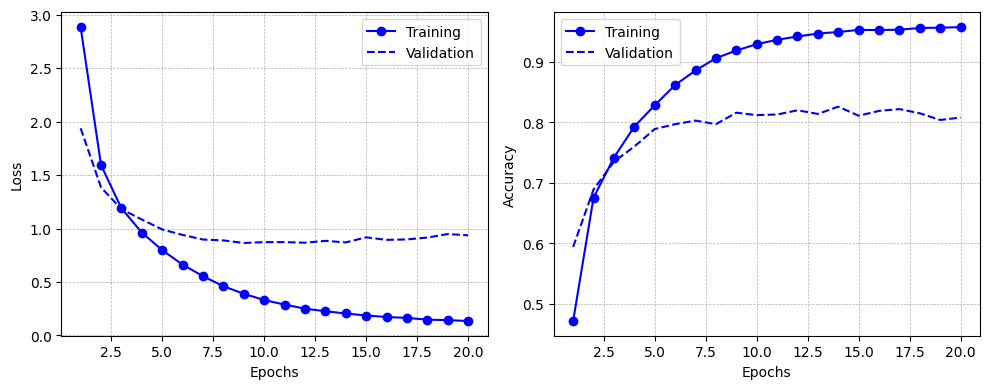

In [33]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

# plot both: loss and accuracy in subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(epochs, loss_values, 'bo-', label='Training')
axes[0].plot(epochs, val_loss_values, 'b--', label='Validation')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(linewidth=0.5, linestyle='--')

axes[1].plot(epochs, acc_values, 'bo-', label='Training')
axes[1].plot(epochs, val_acc_values, 'b--', label='Validation')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from scratch for nine epochs and then evaluate it on the test set.

In [34]:
model = models.Sequential()
model.add(layers.InputLayer(shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val), verbose=0)
results = model.evaluate(x_test, one_hot_test_labels)
print(f"Results: Accuracy: {results[1]} \t Loss: {results[0]}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - acc: 0.7776 - loss: 0.9609
Results: Accuracy: 0.7684773206710815 	 Loss: 1.0090320110321045


##### Further experiments
- Try using larger or smaller layers: 32 units, 128 units, and so on.
- You used two hidden layers. Now try using a single hidden layer, or three hidden layers.

In [35]:
from keras import models
from keras import layers

def solve_reuters(data, epochs=20, batch_size=512, hidden_neurons=[64, 64], activation='relu'):
    x_train = data[0][0]; y_train = data[0][1]
    x_val   = data[1][0]; y_val   = data[1][1]
    x_test  = data[2][0]; y_test  = data[2][1]

    model = models.Sequential()
    model.add(layers.InputLayer(shape=(10000,)))
    for neurons in hidden_neurons:
        model.add(layers.Dense(neurons, activation=activation))
    model.add(layers.Dense(46, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=0)
    results = model.evaluate(x_test, y_test)

    sol_dict = {'epochs': epochs, 'batch_size': batch_size, 'layers': hidden_neurons, 'activation': activation}
    sol_dict['accuracy'] = history.history['acc']
    sol_dict['val_accuracy'] = history.history['val_acc']
    sol_dict['loss'] = history.history['loss']
    sol_dict['val_loss'] = history.history['val_loss']
    sol_dict['test_accuracy'] = results[1]
    sol_dict['test_loss'] = results[0]

    return sol_dict

In [36]:
# Join the data
data = [(x_train, one_hot_train_labels), (x_val, y_val), (x_test, one_hot_test_labels)]

##### Let's study the NN when we change the number of hidden neurons

In [37]:
my_models = []
epochs = 50
hidden_neurons = np.linspace(4, 256, 16, dtype=int)

for neurons in hidden_neurons:
    my_models.append(solve_reuters(data, hidden_neurons=[neurons, neurons], epochs=epochs))

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - acc: 0.6872 - loss: 1.3789
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - acc: 0.7872 - loss: 1.2113
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - acc: 0.7886 - loss: 1.2401
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - acc: 0.7970 - loss: 1.1626
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - acc: 0.8041 - loss: 1.1273
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - acc: 0.7898 - loss: 1.1496
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - acc: 0.8075 - loss: 1.0679
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - acc: 0.8077 - loss: 1.0646
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8030 - loss: 1.0802  
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8118 - loss: 1.0045
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8140 - loss: 1.0116
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8112 - loss: 1.0534
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8090 - loss: 1.0196
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7987 - loss: 1.0718
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 

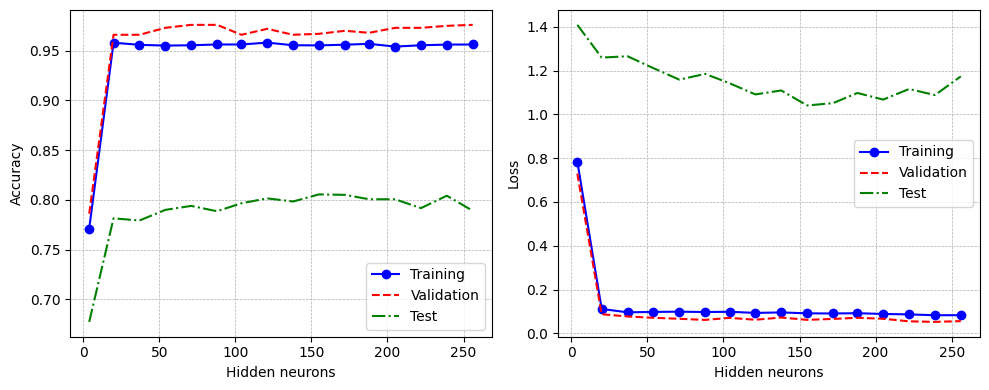

In [38]:
# Plot the results
import matplotlib.pyplot as plt

acc_train = [model['accuracy'][-1] for model in my_models]
acc_val = [model['val_accuracy'][-1] for model in my_models]
acc_test = [model['test_accuracy'] for model in my_models]

loss_train = [model['loss'][-1] for model in my_models]
loss_val = [model['val_loss'][-1] for model in my_models]
loss_test = [model['test_loss'] for model in my_models]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(hidden_neurons, acc_train, 'bo-', label='Training')
axes[0].plot(hidden_neurons, acc_val, 'r--', label='Validation')
axes[0].plot(hidden_neurons, acc_test, 'g-.', label='Test')
axes[0].set_xlabel('Hidden neurons')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(linewidth=0.5, linestyle='--')

axes[1].plot(hidden_neurons, loss_train, 'bo-', label='Training')
axes[1].plot(hidden_neurons, loss_val, 'r--', label='Validation')
axes[1].plot(hidden_neurons, loss_test, 'g-.', label='Test')
axes[1].set_xlabel('Hidden neurons')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()


##### Let's study the NN when we change the number of hidden layers

In [39]:
my_models = []
epochs = 50
hidden_neurons = 64
hidden_layers = np.linspace(1, 6, 6, dtype=int)

for h_layers in hidden_layers:
    my_models.append(solve_reuters(data, hidden_neurons=[hidden_neurons] * h_layers, epochs=epochs))

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - acc: 0.8139 - loss: 0.9944
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - acc: 0.8049 - loss: 1.1093
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - acc: 0.7979 - loss: 1.2342
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - acc: 0.7858 - loss: 1.3763
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - acc: 0.7922 - loss: 1.5632
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - acc: 0.7744 - loss: 1.8913


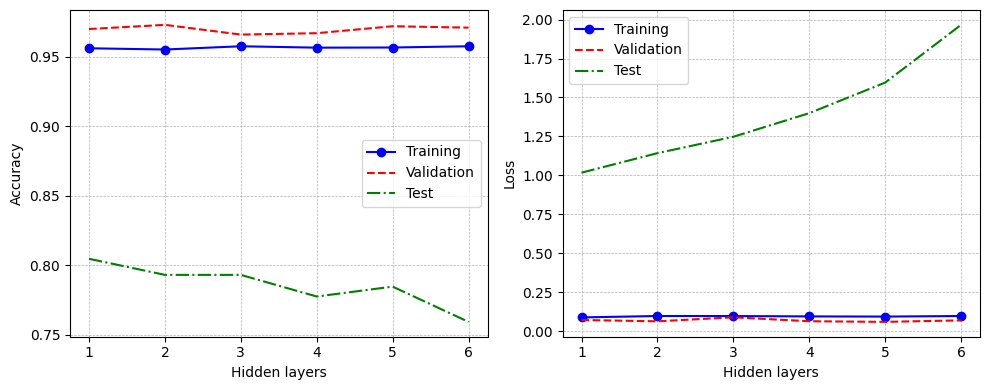

In [40]:
# Plot the results
import matplotlib.pyplot as plt

acc_train = [model['accuracy'][-1] for model in my_models]
acc_val = [model['val_accuracy'][-1] for model in my_models]
acc_test = [model['test_accuracy'] for model in my_models]

loss_train = [model['loss'][-1] for model in my_models]
loss_val = [model['val_loss'][-1] for model in my_models]
loss_test = [model['test_loss'] for model in my_models]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(hidden_layers, acc_train, 'bo-', label='Training')
axes[0].plot(hidden_layers, acc_val, 'r--', label='Validation')
axes[0].plot(hidden_layers, acc_test, 'g-.', label='Test')
axes[0].set_xlabel('Hidden layers')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(linewidth=0.5, linestyle='--')

axes[1].plot(hidden_layers, loss_train, 'bo-', label='Training')
axes[1].plot(hidden_layers, loss_val, 'r--', label='Validation')
axes[1].plot(hidden_layers, loss_test, 'g-.', label='Test')
axes[1].set_xlabel('Hidden layers')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()

#### 2. Predicting house prices: a regression example
The two previous examples were considered classification problems, where the goal was to predict a single discrete label of an input data point. Another common type of machine-learning problem is regression, which consists of predicting a continuous value instead of a discrete label: for instance, predicting the temperature tomorrow, given meteorological data; or predicting the time that a software project will take to complete, given its specifications.

##### The Boston Housing Price dataset
You’ll attempt to predict the median price of homes in a given Boston suburb in the mid-1970s, given data points about the suburb at the time, such as the crime rate, the local property tax rate, and so on. The dataset you’ll use has an interesting difference from the two previous examples. It has relatively few data points: only 506, split between 404 training samples and 102 test samples. And each feature in the input data (for example, the crime rate) has a different scale. For instance, some values are pro- portions, which take values between 0 and 1; others take values between 1 and 12, oth- ers between 0 and 100, and so on.

In [41]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [42]:
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

Training data shape: (404, 13)
Testing data shape: (102, 13)


In [43]:
# The targets are the median values of owner-occupied homes, in thousands of dollars
train_targets[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. This is easily done in Numpy.

NOTE: Note that the quantities used for normalizing the test data are computed using the training data. You should never use in your workflow any quantity computed on the test data, even for something as simple as data normalization.

In [44]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

Note that you compile the network with the mse loss function—mean squared error, the square of the difference between the predictions and the targets. This is a widely used loss function for regression problems.

You’re also monitoring a new metric during training: mean absolute error (MAE). It’s the absolute value of the difference between the predictions and the targets. For instance, an MAE of 0.5 on this problem would mean your predictions are off by $500 on average.

In [45]:
# Building the network
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.InputLayer(shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [46]:
# k-fold validation
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [47]:
for i in range(k):
    print(f'Processing fold #{i}')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [48]:
print(f"All scores: {all_scores}")
print(f"Mean score: {np.mean(all_scores)}")

All scores: [2.381740093231201, 2.438262701034546, 2.684339761734009, 2.510406494140625]
Mean score: 2.503687262535095


The different runs do indeed show rather different validation scores, from 2.3 to 2.8. The average (2.5) is a much more reliable metric than any single score—that’s the entire point of K-fold cross-validation. In this case, you’re off by $2,500 on average, which is significant considering that the prices range from $10,000 to $50,000.

##### Saving the validation logs at each fold

In [49]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f'Processing fold #{i}')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0, validation_data=(val_data, val_targets))
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


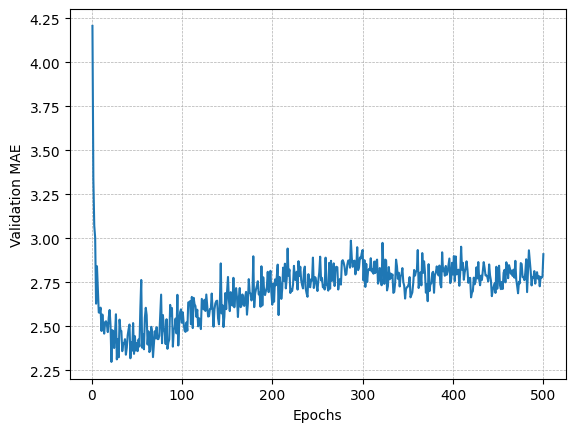

In [50]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.grid(linewidth=0.5, linestyle='--')
plt.show()